In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import seaborn as sns; sns.set()

Written by: Kovalev Alexander  
Department:  MSU, Physics Faculty, Mathematical Modelling and Computer Sciencegr(MMCS), gr. 435    
  
  
Task: Compare perfomance hash functions

In [2]:
def get_digit(n, d):
    for i in range(d-1):
        n //= 10
    return n % 10

def accumulate_sum(array):
    for i in range(1, len(array)):
        array[i] = array[i] + array[i-1]
    return array

def get_num_difit(n):
    i = 0
    while n > 0:
        n //= 10
        i += 1
    return i
def radixsort(l, base=10):
    passes = get_num_difit(max(l))
    output = [0] * len(l)
    
    for pos in range(0, passes+1):
        count = [0] * base
        for i in l:
            digit = get_digit(i, pos)
            count[digit] +=1
        count = accumulate_sum(count)
    
        for i in reversed(l):
            digit = get_digit(i, pos)
            count[digit] -= 1
            new_pose = count[digit]
            output[new_pose] = i
        l = list(output)
    return output

### Run radix sort for array with elements in different number systems

In [6]:
def convert_base(num, to_base=10, from_base=10):
    # first convert to decimal number
    if isinstance(num, str):
        n = int(num, from_base)
    else:
        n = int(num)
    # now convert decimal to 'to_base' base
    alphabet = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    if n < to_base:
        return alphabet[n]
    else:
        return convert_base(n // to_base, to_base) + alphabet[n % to_base]

In [32]:
#interval    0<x<max_value  N = N
N = 30000
max_value =  10000
base_list = [10, 9, 8, 7, 6, 5, 4, 3]

mas = np.random.randint(max_value, size=N)

mas_system = np.zeros((N, len(base_list)))
for i, base in enumerate(base_list):
    new_base = []
    for num in mas:
        new_base.append(convert_base(num, base, 10))
    mas_system[:,i] = new_base
    
mas_system = np.array(mas_system, dtype = 'int')
mas_system.shape

(30000, 8)

In [33]:
mas_time = []

for i in range(mas_system.shape[1]):
    start_time = time.time()
    radixsort(mas_system[:,i], base_list[i])
    end_time = time.time()
    mas_time.append(end_time - start_time )
    
    print("Base number ", base_list[i], 'completed')

Base number  10 completed
Base number  9 completed
Base number  8 completed
Base number  7 completed
Base number  6 completed
Base number  5 completed
Base number  4 completed
Base number  3 completed


Text(0.5, 1.0, 'Сравнение Radix sort для разных систем счисления')

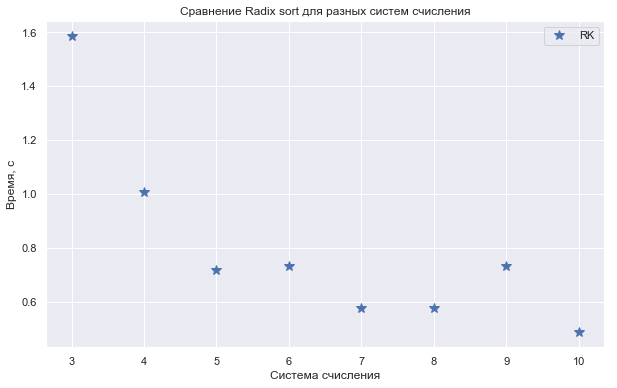

In [34]:
plt.figure(figsize = (10,6))
plt.plot(base_list, mas_time, '*', label='RK', ms=10)
plt.xlabel('Система счисления'); plt.ylabel('Время, c')
plt.legend()
plt.title('Сравнение Radix sort для разных систем счисления')

### Применяем radix sort для массива с разной степенью отсортированности.

In [37]:
def bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] > mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]     
def invert_bubble(mas):
    for j in range(0, len(mas)-1): 
        if mas[j] < mas[j+1] :
            mas[j], mas[j+1] = mas[j+1], mas[j]
            
def create_table(N):
    """Create inverse sorted array
    and take bubble to normal sorted massive
    Output: (N, N)
    """
    Mas = np.zeros((N,2*N))
    Mas[:,N] = np.random.randint(N, size= N)
    for i in range(1,N):
        Mas[:,N+i] = Mas[:,N+i-1]
        bubble(Mas[:,N+i])
        
    for i in range(1,N+1):
        Mas[:,N-i] = Mas[:,N-i+1]
        invert_bubble(Mas[:,N-i])
    return np.array(Mas, dtype = 'int')


In [36]:
Mas = create_table(10000)
print(Mas.shape)
print(Mas[:10,0], Mas[:10,-1])

(10000, 20000)
[9999 9999 9998 9997 9997 9997 9995 9994 9994 9993] [ 0  0  0  4  4  8 10 10 11 14]


In [38]:
def meusure_time_2(fun, table):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    for i in range(table.shape[1]): # progress bar
        start_time = time.time()
        fun(list(table[:, i]))
        end_time = time.time()
        
        mas.append(end_time - start_time)
        if i%10 == 0:
            print(i, " array comleted")
    return mas

In [39]:
matrix = Mas[:,::200]
print(matrix.shape)

array = meusure_time_2(radixsort, matrix)


(10000, 100)
0  array comleted
10  array comleted
20  array comleted
30  array comleted
40  array comleted
50  array comleted
60  array comleted
70  array comleted
80  array comleted
90  array comleted


Text(0.5, 1.0, 'Radix sort для массивов с разной степенью отсортированности . ')

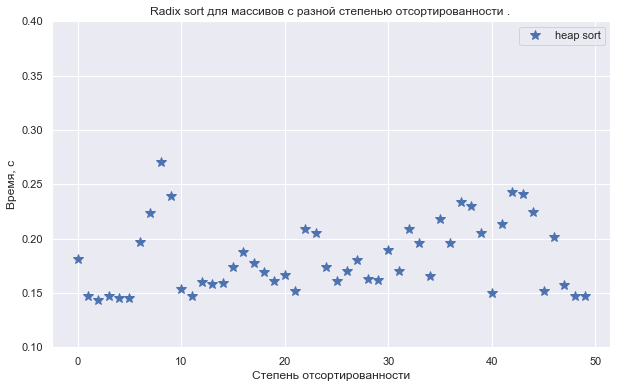

In [366]:

plt.figure(figsize = (10,6))
plt.plot(array, '*', label='heap sort', ms=10)
plt.xlabel('Степень отсортированности'); plt.ylabel('Время, c')
plt.ylim(0.1,0.4)
plt.legend()
plt.title('Radix sort для массивов с разной степенью отсортированности . ')

### Radix sort для разной длины массива


In [8]:
def meusure_time(fun, A, lenghts = [1000]):
    """Функция вычисляющая время работы алгоритма
       для разного размера
       Выводит массив со временем(в секундах)"""
    mas = []
    #N = 3 # по какому брать среднее
    
    for i in lenghts: # progress bar
            start_time = time.time()
            fun(A[:i])
            end_time = time.time()
            mas.append(end_time - start_time)
    return mas

In [3]:
# n is size of heap 
def heapify(arr, N, idx):
    largest = idx # Initialize largest as root 
    left = 2 * idx + 1     # left = 2*i + 1 
    right = left + 1     # right = 2*i + 2 
    
    #compare wirh a child
    if left < N and arr[idx] < arr[left]: 
        largest = left     
    if right < N and arr[largest] < arr[right]: 
        largest = right
    #swap
    if largest != idx: 
        arr[idx], arr[largest] = arr[largest],arr[idx] # swap 
        heapify(arr, N, largest) 
        
def heap_sort(arr): 
    N = len(arr) 
    # Build a maxheap.
    for i in range(N, -1, -1): 
        heapify(arr, N, i) 
        
    for i in range(N-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 
  # Driver code to test above 


# This code is contributed by Mohit Kumra 

In [14]:
k = 1000
A = np.random.randint(100*k, size = 100*k)
B = np.random.randint(k, size = 100*k)
lenghts1 = [i for i in range(k,100*k,5*k)] # 1 000 000
mas_1 = meusure_time(radixsort, A ,lenghts1)
mas_2 = meusure_time(heap_sort, B ,lenghts1)

Text(0.5, 1.0, 'Radix_sort and heap_sort для разной длины массива')

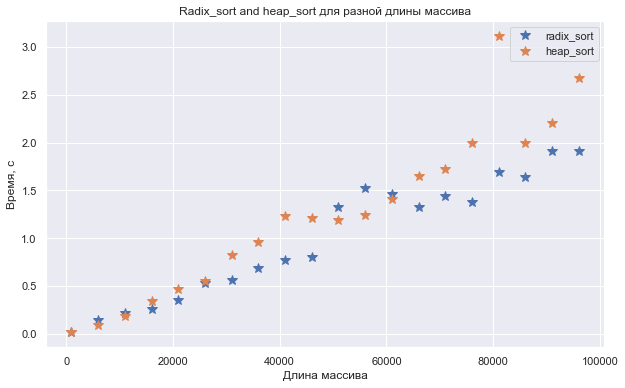

In [15]:
"""asym_1 = 2.3*np.array(lenghts1)/100000
"""
plt.figure(figsize = (10,6))
plt.plot(lenghts1, mas_1, '*', label='radix_sort', ms=10)
plt.plot(lenghts1, mas_2, '*', label='heap_sort', ms=10)

#plt.plot(lenghts1, asym_1, '--',label ='n')
#plt.plot(lenghts, mas2, 'o', label ='heap_sort', ms=8)
plt.xlabel('Длина массива'); plt.ylabel('Время, c')
plt.legend()
plt.title('Radix_sort and heap_sort для разной длины массива')